## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [4]:
import json
from pandas.io.json import json_normalize
from collections import OrderedDict
from IPython.display import display
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
raw_json = json.loads(open("logins.json").read())
normed_json = json_normalize(raw_json,'login_time')
normed_json.tail()

,0
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Right away we can see here that this data is on the UNIX epoch, since it's safe to say that no one was loging into an app in 1970. This frequently happens when a date is saved in excel or the like, coverted to text from the epoch and then exported. To reverse we'll do this we'll add the number of days between 1/1/1970 and 1/1/2019 to each value.

In [4]:
normed_json[0].head()

0    1970-01-01 20:13:18
1    1970-01-01 20:16:10
2    1970-01-01 20:16:37
3    1970-01-01 20:16:36
4    1970-01-01 20:26:21
Name: 0, dtype: object

In [54]:
from time import time
from datetime import timedelta

normed_json['corrected_date'] = pd.to_datetime(normed_json[0]) + timedelta(days=17897)
normed_json.head()

,0,count,corrected_date
corrected_date,,,
2019-01-01 20:13:18,1970-01-01 20:13:18,1,2019-01-01 20:13:18
2019-01-01 20:16:10,1970-01-01 20:16:10,1,2019-01-01 20:16:10
2019-01-01 20:16:37,1970-01-01 20:16:37,1,2019-01-01 20:16:37
2019-01-01 20:16:36,1970-01-01 20:16:36,1,2019-01-01 20:16:36
2019-01-01 20:26:21,1970-01-01 20:26:21,1,2019-01-01 20:26:21


In [14]:
normed_json.set_index("corrected_date", inplace = True)
normed_json['count']=1
normed_json_min = normed_json.resample('15Min').sum()
normed_json_min.head()

,count
corrected_date,
2019-01-01 20:00:00,2
2019-01-01 20:15:00,6
2019-01-01 20:30:00,9
2019-01-01 20:45:00,7
2019-01-01 21:00:00,1


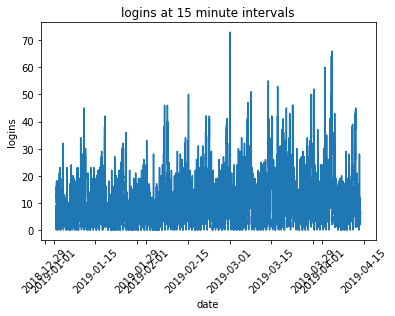

In [17]:
# plotting it out

plt.plot(normed_json_min.index, normed_json_min['count'])
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('logins at 15 minute intervals');

In [32]:
normed_json_day = normed_json.resample('24h').sum()
normed_json_day

,count
corrected_date,
2019-01-01,112
2019-01-02,681
2019-01-03,793
2019-01-04,788
2019-01-05,459
...,...
2019-04-09,818
2019-04-10,1009
2019-04-11,1352


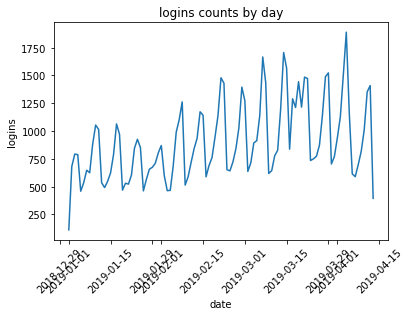

In [34]:
# histogram

plt.plot(normed_json_day.index, normed_json_day['count'])
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('logins counts by day');

In [44]:
mon = normed_json.resample('W-MON').sum()
tues = normed_json.resample('W-TUE').sum()
weds = normed_json.resample('W-WED').sum()
thurs = normed_json.resample('W-THU').sum()
fri = normed_json.resample('W-FRI').sum()
sat = normed_json.resample('W-SAT').sum()
sun = normed_json.resample('W-SUN').sum()
sun

,count
corrected_date,
2019-01-06,3369
2019-01-13,5250
2019-01-20,4995
2019-01-27,4778
2019-02-03,4780
2019-02-10,5613
2019-02-17,6090
2019-02-24,7051
2019-03-03,6610


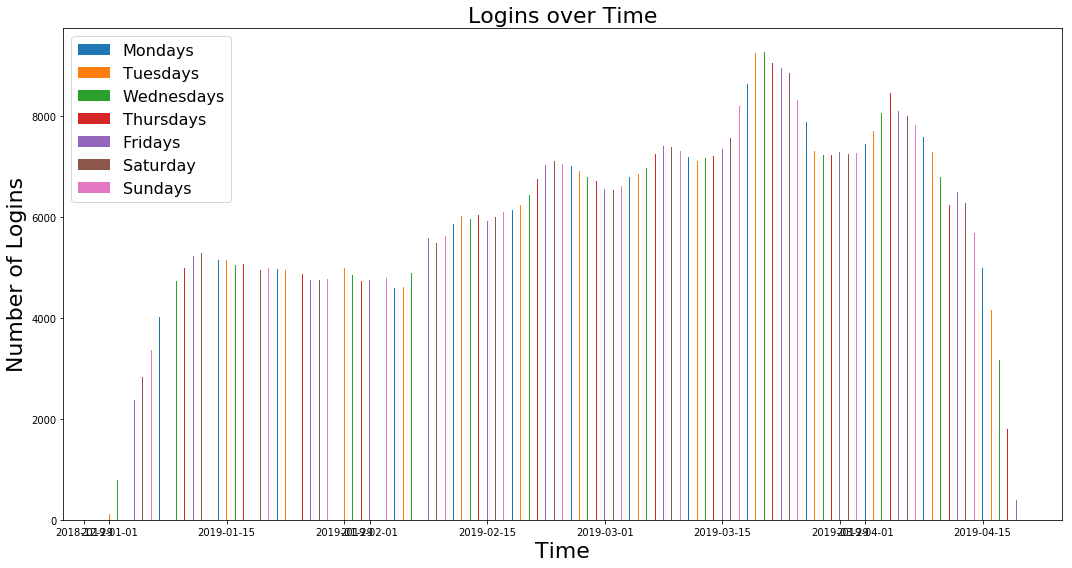

In [48]:
# line, scatterplot, and histograms of the binned data
fig, ax = plt.subplots(figsize = (15,8))
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Number of Logins', fontsize = 22)
plt.title('Logins over Time', fontsize = 22)

plt.bar(mon.index, mon["count"], align= 'center', width = 0.1, label = "Mondays")
plt.bar(tues.index, tues["count"], label = 'Tuesdays', align = 'center', width = 0.1)
plt.bar(weds.index, weds["count"], label = "Wednesdays", align= 'center', width = 0.1)
plt.bar(thurs.index, thurs["count"], label = "Thursdays", align= 'center', width = 0.1)
plt.bar(fri.index, fri["count"], align= 'center', width = 0.1, label = "Fridays")
plt.bar(sat.index, sat["count"], label = 'Saturday', align = 'center', width = 0.1)
plt.bar(sun.index, sun["count"], label = "Sundays", align= 'center', width = 0.1)

plt.legend(loc='upper left', fontsize = 16)
plt.tight_layout()

In [99]:
hourly = normed_json.resample('1H').sum()
hourly

,count
corrected_date,
2019-01-01 20:00:00,24
2019-01-01 21:00:00,9
2019-01-01 22:00:00,21
2019-01-01 23:00:00,58
2019-01-02 00:00:00,53
...,...
2019-04-13 14:00:00,32
2019-04-13 15:00:00,19
2019-04-13 16:00:00,22


In [119]:
mon_H = hourly.resample('1H').sum()

In [ ]:
fakehrs = hourly

fakehrs.reset_index(level=0, inplace=True)

In [154]:
fakehrs['day_of_week'] = pd.to_datetime(fakehrs['corrected_date']).dt.dayofweek
fakehrs['hour_of_day'] = pd.to_datetime(fakehrs['corrected_date']).dt.hour

In [166]:
fakehrs  = fakehrs.groupby(['day_of_week', 'hour_of_day']).sum()
fakehrs.reset_index(inplace=True)

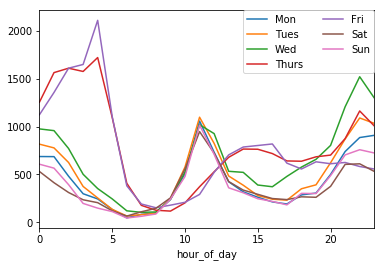

In [180]:
df = fakehrs.pivot(index='hour_of_day', columns='day_of_week', values='count')

df.plot()
plt.legend(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'],ncol=2, borderaxespad=0.)

## Analysis

So we see big spikes on Thursday and Friday mornings, regular lunch spikes every other day, and pretty even flow otherwise with the classic 'drive times'.

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
    
-  What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

        
- Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Answer:

For key metrics I'd consider first the business use case as something like cost per revenue; if Ultimate is spending as much in toll costs to drive across the bridge, then it's not worth it on it's face. So I'd first propose considering number of drivers who accept the cost and how many additional fares that creates. Second would be if we see an increase in usage in the respective cities over all due to increased driver availability.

For an Experiment I'd consider doing a randomized controlled experiment where drivers are split into three groups, 

- toll reimbursement
- new city bonus
- control

I'd use the new city bonus to see if drivers would be more engaged by the idea of a 'bonus' as opposed to a reimbursement. Humans are bad at considering sunk cost but will do a lot of a 'bonus' even if it's not particularly valuable. 

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

### Cleaning

while you'll see there were some missing values below I decided to drop the catagorical ones and fill in the missing average ratings with the mean. 

### Feature Creation

I created a target metric called six months that showed if they were active more than 6 months past their sign up date, which was slightly tricky since the company considers someone active up to 29 days past their last actual ride so I created a time delta, added 29 to it, and then selected the rows where that number was above 180 (aprox 6 months of days).

I also created dummy variables for the catagorical features.

### Exploration

I created a correlation matrix to see what the most highly correlated values were in relation to the target 'six months', as well as some plots to gauge values. The largest differences seemed to be dependant on phone, if they were a black car (executive car) user, and average distance as well as city. 

In [5]:
file = open('ultimate_data_challenge.json', 'r')
riders = pd.DataFrame(json.load(file))
file.close()

riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
print(riders.shape)

(50000, 12)


In [184]:
riders.isnull().values.any()

True

In [186]:
riders.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [ ]:
## shift values to dates
riders['signup_date']=pd.to_datetime(riders['signup_date'])
riders['last_trip_date']=pd.to_datetime(riders['last_trip_date'])

# time delta functions
riders['first_last_activity'] =  [ (i.days) for i in (riders['last_trip_date'] - riders['signup_date'])]
riders["six_months"] = np.where(riders['first_last_activity']+29>=180, 1, 0)

# One hot encoding catagorical variables
riders = pd.get_dummies(riders, columns = ['city', 'phone', 'ultimate_black_user'])
riders

In [17]:
riders.six_months.sum()

12198

First let's check values that are correlated with six_month retention:

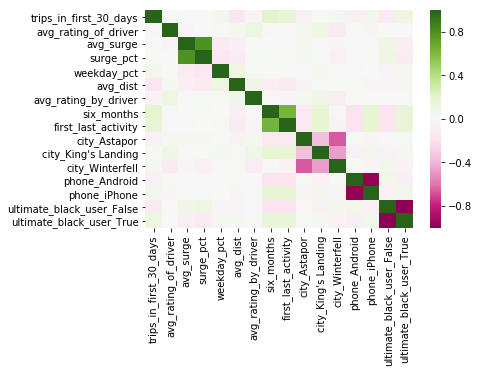

In [26]:
import seaborn as sb

corr = riders.corr(method='pearson')
sb.heatmap(corr, cmap= 'PiYG')

What's interesting is that it seems like the most positively correlated values are being an executive car user,  type of phone, and riders who live in King's Landing. The most negative seems to be being in Astapor and having long distance rides.

In [30]:
corr.six_months.sort_values(ascending=False)

six_months                   1.000000
first_last_activity          0.637210
trips_in_first_30_days       0.204841
city_King's Landing          0.180708
phone_iPhone                 0.176607
ultimate_black_user_True     0.159157
surge_pct                    0.017045
avg_surge                    0.006267
weekday_pct                  0.005518
avg_rating_of_driver        -0.008835
city_Winterfell             -0.020727
avg_rating_by_driver        -0.022339
avg_dist                    -0.091802
city_Astapor                -0.132408
ultimate_black_user_False   -0.159157
phone_Android               -0.176623
Name: six_months, dtype: float64

I wanted to check if the ratings between cities were particularly different, so I mapped that by satisfaction with driver, vs other important variables like phone type and executive car user.

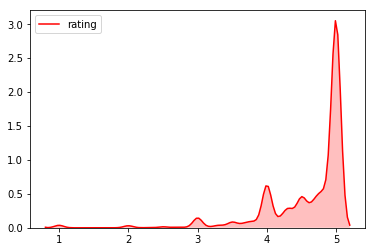

In [32]:
import warnings
p1=sb.kdeplot(riders['avg_rating_of_driver'], shade=True, color="r",  label='rating')

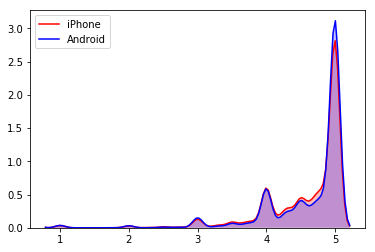

In [38]:
p1=sb.kdeplot(riders['avg_rating_of_driver'][riders['phone_iPhone']==1], shade=True, color="r",  label='iPhone')
p1=sb.kdeplot(riders['avg_rating_of_driver'][riders['phone_iPhone']==0], shade=True, color="b", label='Android')

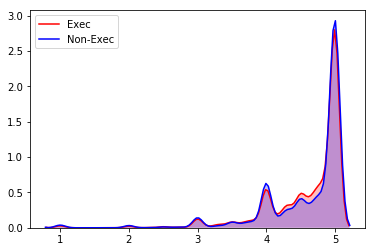

In [39]:
p1=sb.kdeplot(riders['avg_rating_of_driver'][riders['ultimate_black_user_True']==1], shade=True, color="r",  label='Exec')
p1=sb.kdeplot(riders['avg_rating_of_driver'][riders['ultimate_black_user_True']==0], shade=True, color="b", label='Non-Exec')

Pretty even in both cases so it seems satisfaction with our drivers isn't the problem.

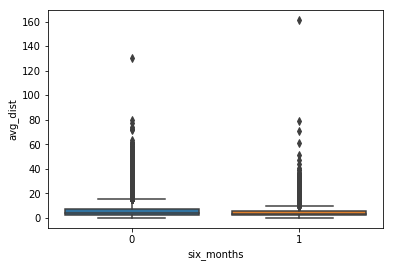

In [45]:
sb.boxplot(x="six_months", y="avg_dist", data=riders)

In [47]:
riders.groupby('six_months').avg_dist.mean()

six_months
0    6.094451
1    4.874479
Name: avg_dist, dtype: float64

In [74]:
# now going back to fill in the na values
riders.avg_rating_by_driver = riders.avg_rating_by_driver.fillna(riders.avg_rating_by_driver).mean()
riders.avg_rating_of_driver = riders.avg_rating_of_driver.fillna(riders.avg_rating_of_driver).mean()

riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
trips_in_first_30_days       50000 non-null int64
signup_date                  50000 non-null datetime64[ns]
avg_rating_of_driver         50000 non-null float64
avg_surge                    50000 non-null float64
last_trip_date               50000 non-null datetime64[ns]
surge_pct                    50000 non-null float64
weekday_pct                  50000 non-null float64
avg_dist                     50000 non-null float64
avg_rating_by_driver         50000 non-null float64
six_months                   50000 non-null int64
first_last_activity          50000 non-null int64
city_Astapor                 50000 non-null uint8
city_King's Landing          50000 non-null uint8
city_Winterfell              50000 non-null uint8
phone_Android                50000 non-null uint8
phone_iPhone                 50000 non-null uint8
ultimate_black_user_False    50000 non-null uint8
ultimate_bl

### Model creation

I decided to use a random forest classifier and an xgboost classifier as the primary models. I passed the data through a normalizer to standarize the data into a more normal distribution and then performed a grid search for both models. 

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

target_metric = riders['six_months'].values

#features = [col for col in riders.columns if 'six_months' not in col]
ind_features = riders.drop(['six_months',"first_last_activity","signup_date", "last_trip_date"], axis = 1).values


In [76]:
ind_features

array([[4.        , 4.60155929, 1.1       , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 4.60155929, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [3.        , 4.60155929, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 4.60155929, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [2.        , 4.60155929, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 4.60155929, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [77]:
## split the data
X_train, X_test, y_train, y_test = train_test_split(ind_features, target_metric, test_size=0.2, random_state=123)

print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(40000, 14) (40000,)
(10000, 14) (10000,)


In [106]:
pipe_rf = Pipeline([('scl', QuantileTransformer()),('clf', RandomForestClassifier(random_state=123))])

pipe_xgb = Pipeline([('scl', QuantileTransformer()),('clf', XGBClassifier(random_state=123))])

In [107]:
# Set grid search params
md_range = [1,2,5]
param_range_fl = [1.0, 0.5, 0.1]
param_range_treesd = [ None,3,  5]
param_range_treesf = [None, 10, 25]
param_range_treeml = [50, 100, 200] 
param_range_treesne = [500, 600, 700] 
e_stop = [10]

grid_params_rf = [{'clf__min_samples_leaf': param_range_treeml,'clf__max_depth': md_range, 'clf__min_samples_split': param_range_treeml, "clf__min_impurity_decrease":e_stop}]

grid_params_xgb = [{"clf__objective" : ['binary:logistic'] ,'clf__min_samples_leaf': param_range_treeml,'clf__max_depth': md_range,  'clf__n_samples_split':param_range_treesne, "clf__early_stopping_rounds":e_stop}]

In [80]:
jobs = -1

gs_rf = GridSearchCV(estimator=pipe_rf,param_grid=grid_params_rf,cv=5,n_jobs=jobs,verbose = 10,scoring='accuracy')

gs_xgb = GridSearchCV(estimator=pipe_xgb,param_grid=grid_params_xgb,scoring='accuracy',cv=3,n_jobs=jobs,verbose = 10)

In [108]:
## random forest regressor
import time
start = time.gmtime()
gs_rf.fit(X_train, y_train)
end = time.gmtime()
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time.mktime(time.gmtime()) - time.mktime(start), len(gs_rf.cv_results_['params'])))
gs_rf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.2s


GridSearchCV took 17.00 seconds for 27 candidate parameter settings.


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   16.9s finished
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'clf__max_depth': 1,
 'clf__min_impurity_decrease': 10,
 'clf__min_samples_leaf': 50,
 'clf__min_samples_split': 50}

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7528
           1       0.00      0.00      0.00      2472

   micro avg       0.75      0.75      0.75     10000
   macro avg       0.38      0.50      0.43     10000
weighted avg       0.57      0.75      0.65     10000



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


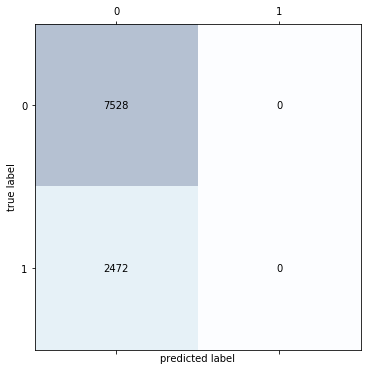

In [85]:

# make predictions on the test set
y_pred = gs_rf.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = 'Blues', alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [88]:
y_pred.sum()

0

In [109]:
## I reduced the folds here seeing the earlier errors, and wanting to reduce time
import time
xgb_start = time.gmtime()
gs_xgb.fit(X_train, y_train)
xgb_end = time.gmtime()
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."% (time.mktime(time.gmtime()) - time.mktime(xgb_start), len(gs_xgb.cv_results_['params'])))
gs_xgb.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:  1.0min remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.1min finished


GridSearchCV took 71.00 seconds for 27 candidate parameter settings.


{'clf__early_stopping_rounds': 10,
 'clf__max_depth': 5,
 'clf__min_samples_leaf': 50,
 'clf__n_samples_split': 500,
 'clf__objective': 'binary:logistic'}

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7528
           1       0.64      0.38      0.47      2472

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.73      0.65      0.67     10000
weighted avg       0.77      0.79      0.77     10000



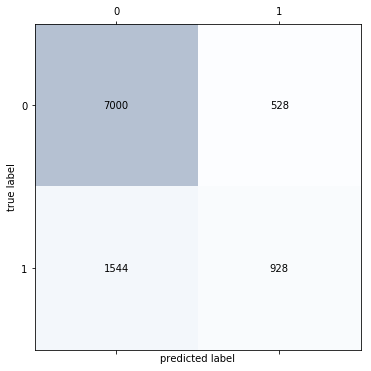

In [90]:

# make predictions on the test set
y_pred = gs_xgb.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = 'Blues', alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

The first model failed most likely due to the data being too imbalanced to handle the predictions so it breaks hard toward being a non-renewal.  The boosted trees can handle this problem, rather fantastically actually, given that Recall and precision.  Below is the feature importance for this model

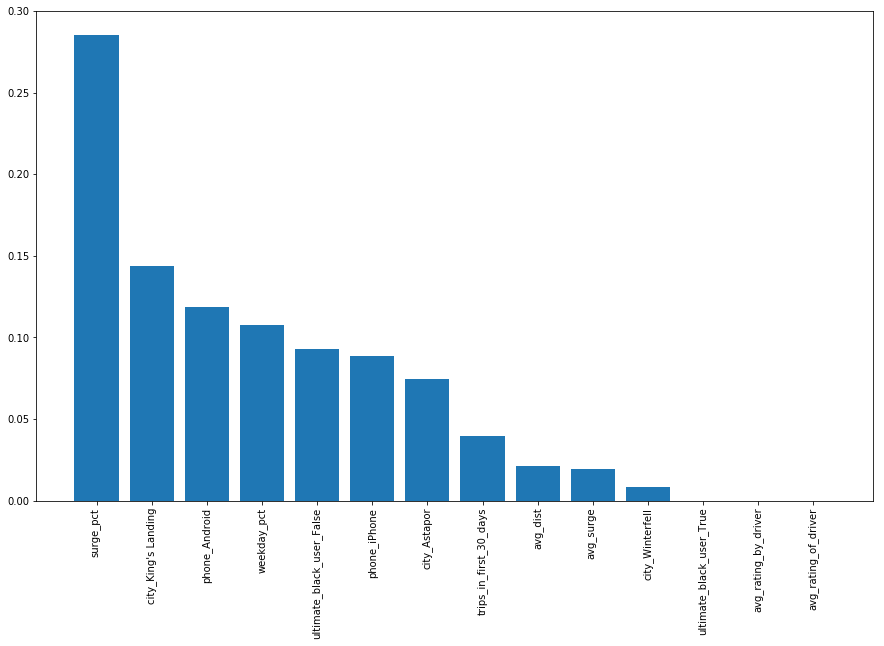

In [119]:
# calculate feature importances
importance = gs_xgb.best_estimator_.named_steps["clf"].feature_importances_
# sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [ riders.drop(['six_months',"first_last_activity","signup_date", "last_trip_date"], axis = 1).columns[i] for i in indices]

plt.figure(figsize = (15, 9))
plt.bar(range( riders.drop(['six_months',"first_last_activity","signup_date", "last_trip_date"], axis = 1).shape[1]), importance[indices])
plt.xticks(range( riders.drop(['six_months',"first_last_activity","signup_date", "last_trip_date"], axis = 1).shape[1]), names, rotation = 90);

What's interesting is that while the city and phone type do pop here, The Percentage Surge seems to also be a deciding factor. 

## Conclusions

I'd encourage Ultimate to look at three things: 

1) what the difference is between the iPhone and Android interfaces that's causing such drop off

2) re-considering how surge pricing is handled, prehaps preventing it for new users

3) what the difference is between the cities that's also causing these discrepancies in performance that seem locality based.
